# Put out questions:
# What factors made passengers more or less likely to survive?
# What interesting hypothesis or facts probably lie behind those factors?

## First step:Import and clear up data

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('/Users/yangrenqin/Downloads/titanic-data.csv')
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [2]:
# pick out the information about the people who survived
survived=data[data.Survived==1]

survived.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


# 1. Embark position

In [3]:
# According to the embark poistion, 'gourpby' data 
# And count the number of people survived or not embarked through different poistion
embarked_survived=survived.groupby('Embarked').count().Survived
embarked_totalcounts=data.groupby('Embarked').count().Survived

survived_total=len(survived)/len(data)

In [4]:
sum(pd.isnull(data.Embarked)) 

2

## There are two embarked data(in 'Embarked column') are missed, and labeled as 'NaN'.  However, it doesn't influence how we count the number of people involved when we used 'gourpby.count()' function for a numpy object.

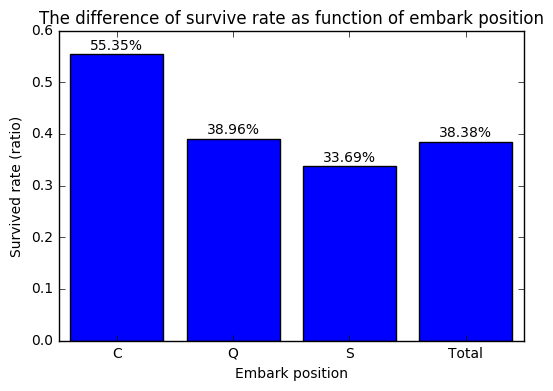

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# compare the surviving rate of different embark poistion, including the whole population.
embarked_survivedrate=np.array(embarked_survived)/np.array(embarked_totalcounts)
all_survivedrate=np.append(embarked_survivedrate,survived_total)
labels=['C','Q','S','Total']
plt.bar(np.arange(4),all_survivedrate,align='center',tick_label=labels)
plt.xlabel('Embark position')
plt.ylabel('Survived rate (ratio)')
plt.title('The difference of survive rate as function of embark position')
for a,b in zip(np.arange(4),all_survivedrate):
    c=str(b*100)[:5]+"%"
    plt.text(a,b+0.01,c,horizontalalignment='center')

## From the graph, we can see that the survive rate for the people who embarked through C are obviously higher than Q or S models, meanwhile, Q model's survive rate is also higher than S'model. Therefore, I expect that embarking through different poistion might influence people's chance to survive.

## Null hypothesis: There is no differences in terms of population mean of survive rate between passengers with different embark position, that is the survive rates for people who embarked through C,Q,S, these three variables are independent.

## Alternative hypothesis: The population mean of survive rate for the passenger embarked through C,Q,S, these three variables are not independent.

## Taking a Chi-Squared test, with $\alpha$level equals 0.05.

In [6]:
from scipy.stats import chi2_contingency
pivot_embarked = pd.pivot_table(data = data[['Survived', 'Embarked']], index = 'Survived', columns = ['Embarked'], aggfunc = len)
chi2, p_value, dof, expected = chi2_contingency(pivot_embarked)
print ("Results of Chi-Squared test on Embarked to Survival.")
print ("Does Embark position have a significant effect on Survival?")
print ("Chi-Squared Score = %f"%chi2)
print ("Pvalue = %s"%str(p_value))

Results of Chi-Squared test on Embarked to Survival.
Does Embark position have a significant effect on Survival?
Chi-Squared Score = 26.489150
Pvalue = 1.76992228412e-06


## The results are significant for all reasonable alphas, including 0.05, we reject the null hypothesis, and accept the alternative hypothesis. Survive rate for the passenger embarked through C,Q,S, these three variables are not independent. Combining with former graph, I deduced that embarking through C does help people get more chance to survive, comparing to the other two population.
## C represents Cherbourg, so the people who embarked from Cherbourg might just are natives belong to this town. Therefore, we can propose that they might be stronger or more familiar with extreme situation and know more about how to safe themselve, and finally they got more chance to survive.

# 2. Passenger class

In [7]:
pclass_survived=survived.groupby('Pclass').count().Survived
pclass_totalcounts=data.groupby('Pclass').count().Survived

In [8]:
sum(pd.isnull(data.Pclass)) 

0

## There is no missing data in Passengers' class (the 'Pclass' column)

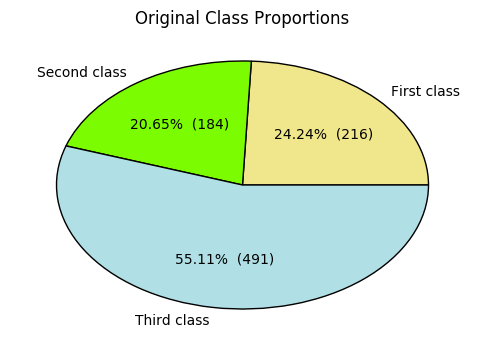

In [9]:
labels=['First class','Second class','Third class']
colors=['Khaki','LawnGreen','PowderBlue']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Original Class Proportions')
plt.pie(pclass_totalcounts,labels=labels,colors=colors,autopct=make_autopct(pclass_totalcounts));

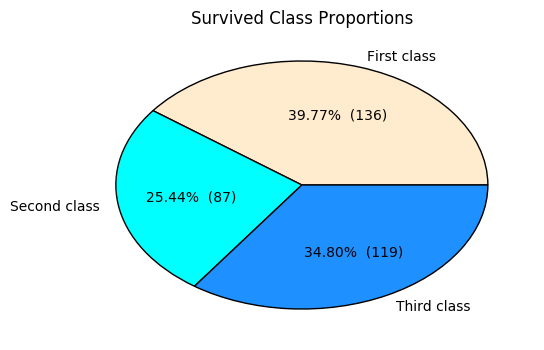

In [10]:
labels=['First class','Second class','Third class']
colors=['BlanchedAlmond','Aqua','DodgerBlue']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Survived Class Proportions')
plt.pie(pclass_survived,labels=labels,colors=colors,autopct=make_autopct(pclass_survived));

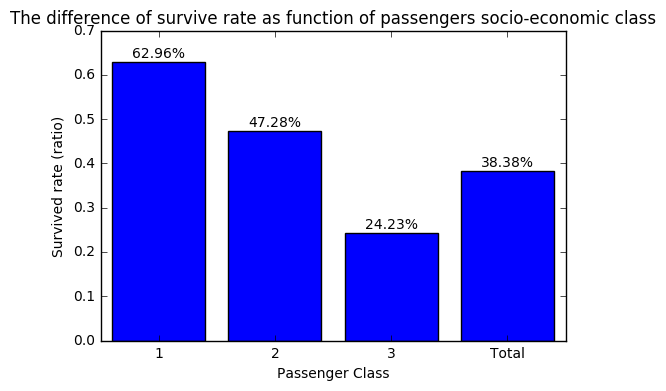

In [11]:
pclass_survivedrate=np.array(pclass_survived)/np.array(pclass_totalcounts)
allpclass_survivedrate=np.append(pclass_survivedrate,survived_total)
labels=['1','2','3','Total']
plt.bar(np.arange(4),allpclass_survivedrate,align='center',tick_label=labels)
plt.xlabel('Passenger Class')
plt.ylabel('Survived rate (ratio)')
plt.title('The difference of survive rate as function of passengers socio-economic class')
for a,b in zip(np.arange(4),allpclass_survivedrate):
    c=str(b*100)[:5]+"%"
    plt.text(a,b+0.01,c,horizontalalignment='center')

## From the graphs, we can see that the survive conditions for the people with different socio-economic class obviously vary with each other. Fisrt, we got much fewer class one and two passengers than class three originally before the accident, which also may symbolize that only wealthy people could afford upper class tickets. However, after the accident, the higher class, there were more people survived. Moveover, we can easily tell passengers with higher class have much higher survive rate through the third graphs. Therefore, I expect that people with higher socio-economic class (like class 1) have more chance to survive.
## Null hypothesis: There is no differences in terms of population mean of survive rate between different socio-economic class, that is the survive rates for people with different class 1,2,3, these three variables are independent.

## Alternative hypothesis: There is significant differences of survive rate between different socio-economic class, that is the survive rates for people with different class 1,2,3, these three variables are not independent.


## Taking a Chi-Squared test, with $\alpha$level equals 0.05.

In [12]:
from scipy.stats import chi2_contingency
pivot_pclass = pd.pivot_table(data = data[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
chi2, p_value, dof, expected = chi2_contingency(pivot_pclass)
print ("Results of Chi-Squared test on Pclass to Survival.")
print ("Does Pclass have a significant effect on Survival?")
print ("Chi-Squared Score = %f"%chi2)
print ("Pvalue = %s"%str(p_value))

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 102.888989
Pvalue = 4.5492517113e-23


## The results are significant for all reasonable alphas, including 0.05, so we reject the null hypothesis, and accept the alternative hypothesis. That is the survive rates for people with different class 1,2,3, these three variables are not independent. Along with former graphs, I suppose that the population mean of survive rate for the passenger with higher class mode will be higher than the counterpart of lower class.

## 'Pclass' represent socio-economic status, and 1 is upper class while 3 is lower class. From the results we got, we can audaciously hypothesis that wealthy people were put on lifeboats first which were very limited. With the run out of lifeboats, poor people were only conuted on their own, which obviously resulted in much lower survive rate among them.

# 3. Male/Female

In [13]:
sex_survived=survived.groupby('Sex').count().Survived
sex_totalcounts=data.groupby('Sex').count().Survived

sex_rate=np.array(sex_survived)/np.array(sex_totalcounts)

In [14]:
sum(pd.isnull(survived.Sex)) # Also no missing data in sex column

0

## There is no missing data in passengers' sex (the 'Sex' column)

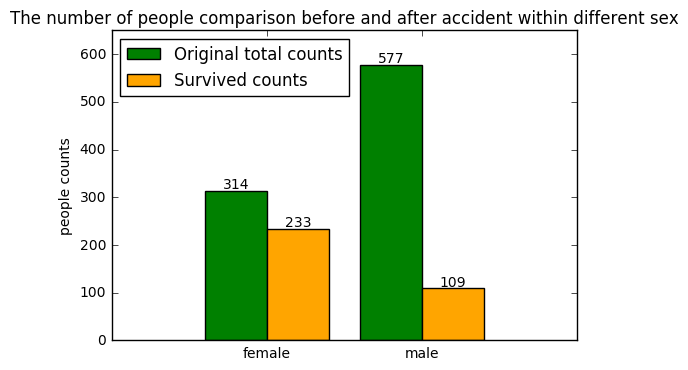

In [15]:
plt.bar([1.2,3.2],sex_totalcounts,width=0.8,color='green',label='Original total counts')
plt.bar([2,4],sex_survived,width=0.8,color='orange',label='Survived counts')
plt.xlim(0,6)
plt.ylim(0,650)
plt.xticks([2,4],('female','male'))
plt.legend(loc='best')
plt.ylabel('people counts')
plt.title('The number of people comparison before and after accident within different sex')
for a,b in zip([1.6,3.6],sex_totalcounts):
    c=str(b)
    plt.text(a,b+5,c,horizontalalignment='center')
for a,b in zip([2.4,4.4],sex_survived):
    c=str(b)
    plt.text(a,b+5,c,horizontalalignment='center')

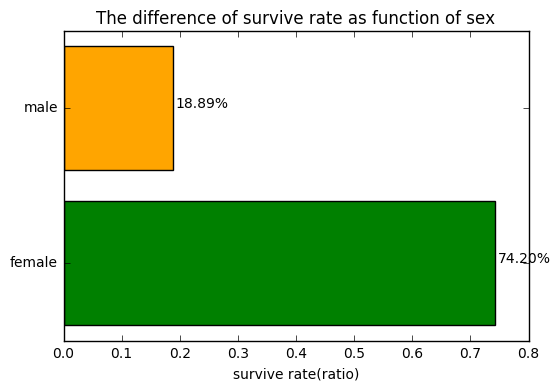

In [16]:
plt.barh([1,2],sex_rate,align='center',color=['green','orange'])
plt.yticks([1,2],['female','male'])
plt.xlabel('survive rate(ratio)')
plt.title('The difference of survive rate as function of sex')
for a,b in zip([1,2],sex_rate):
    c=str(b*100)[:5]+'%'
    plt.text(b+0.05,a,c,horizontalalignment='center')

## From the graphs, we can see that the survive rate for female is obviously higher than male's. Therefore, I expect that female have more chance to survive, comparing to the male population.
## Null hypothesis: There is no differences in terms of population mean of survive rate between female and male, that is the survive rates for females and males, these two variables are independent.

## Alternative hypothesis: There is significant difference of survive rate between females and males, that is the survive rates for females and males, these two variables are not independent.

## Taking Chi-Squared test, with $\alpha$level equals 0.05.

In [17]:
pivot_sex = pd.pivot_table(data = data[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)
chi2, p_value, dof, expected = chi2_contingency(pivot_sex)
print ("Results of Chi-Squared test on Sex to Survival.")
print ("Does Sex have a significant effect on Survival?")
print ("Chi-Squared Score = %f"%chi2)
print ("Pvalue = %s"%str(p_value))

Results of Chi-Squared test on Sex to Survival.
Does Sex have a significant effect on Survival?
Chi-Squared Score = 260.717020
Pvalue = 1.19735706278e-58


## The results are significant for all reasonable alphas, including 0.05, so we reject the null hypothesis, and accept the alternative hypothesis. That is the survive rates for females and males, these two variables are independent. Along with former graphs, I deduce that females does have more chance to survive, comparing to the males.

## First, from the original data, we can see there are far more survived females than males. And we also concluded that the survived rate of females is significantly higher than males' survived rate. With the inference from test two, we can deduce that there were much more weathy females than males in the upper class, and they got easily survived. Even more, those females who were not in the upper class, somehow knew more about how to survive under such extreme situation, comparing to the males within the same class.

# Discussion

## I hypothesized that embark position, passengers' socio-economic class and sex would have significant influence on the passengers' survived rate. Firstly, I used different plots to get roughly trend and direction on which factors would increase survive rate whereas others would decrease survive rate. I used one-tailed Chi-squared test with $\alpha$ level equals 0.05 within all three hypothesis.
## With careful anlysis and tests, I got below results:
## 1. Embarking through C does help people get more chance to survive, comparing to the whole population.
## 2. The population mean of survive rate for the passenger with higher class mode will be higher than the counterpart of lower class.
## 3. Female does have more chance to survive, comparing to the male.

## Based on the results I got from tests, I put my hypothesis further. people who embarked from Cherbourg might just are natives belong to this town. They might be stronger or more familiar with extreme situation and know more about how to safe themselve, and finally they got more chance to survive. Wealthy people were put on lifeboats first which were very limited. With the run out of lifeboats, poor people were only conuted on their own, which obviously resulted in much lower survive rate among them. There were much more weathy females than males in the upper class, and they got easily survived. Even more, those females who were not in the upper class, somehow knew more about how to survive under such extreme situation, comparing to the males within the same class.

## However, there are still some limitions among my analysis. The data I used with are somehow not 100% accurate. And it also contains many empty data which could possibly influence my test results, eventhough I've dealt with those 'Nan' values in my test. Moveover, my further hypothsis are only based on what I got from fomer tests, they arenot scientifically effective since I didn't test them with any possible ways.